In [1]:
from dpm.models import PMF
from dpm.distributions import Data, Normal
from dpm.visualize import plot_stats
import numpy as np
import torch
N = 60
M = 50
D = 3



In [2]:
def build_toy_dataset(U, V, N, M, noise_std=0.1):
    R = np.dot(np.transpose(U), V) + np.random.normal(0, noise_std, size=(N, M))
    return R

In [3]:
U_true = np.random.randn(D, N)
V_true = np.random.randn(D, M)
V_true.shape

(3, 50)

In [4]:
R_true = np.stack([build_toy_dataset(U_true, V_true, N, M) for _ in range(1000)])
R_true.shape
R_true = torch.tensor(R_true).float()
R_true.shape

torch.Size([1000, 60, 50])

In [5]:
model = PMF(N, M, D)
model.U.shape, model.V.shape

(torch.Size([3, 60]), torch.Size([3, 50]))

In [6]:
model.sample(3)

tensor([[[-1.2359,  0.4330, -0.4992,  ..., -0.9075, -0.0520,  1.3164],
         [ 0.7960,  0.1894,  0.4865,  ..., -0.4677, -0.0996,  0.2210],
         [-1.2398, -0.4045, -0.3438,  ..., -0.7448,  1.4747,  2.3727],
         ...,
         [ 1.8262, -0.3279,  1.0394,  ..., -2.0735,  0.0063, -0.9769],
         [-0.2886,  0.3639,  1.0466,  ..., -1.5215, -0.7632, -0.5838],
         [-0.3996,  0.3982, -2.1698,  ..., -0.4574, -0.5792, -0.0943]],

        [[-0.0516, -0.4776,  2.0372,  ..., -0.1799,  1.3286, -0.6448],
         [-0.6302,  0.8189,  0.2959,  ..., -1.5730, -1.0515,  0.7124],
         [ 1.7072,  0.0884,  0.1608,  ..., -0.1201,  0.0619,  1.2812],
         ...,
         [-0.1006,  0.0031,  0.9019,  ..., -0.4989, -0.0580, -0.7614],
         [ 0.8224,  0.7363, -2.1668,  ...,  1.2739,  0.0164,  0.8147],
         [ 3.0691,  1.4256,  0.1049,  ..., -0.5874, -0.0141, -0.3086]],

        [[-0.9062,  0.7132, -0.4989,  ...,  0.8319, -0.1809, -0.2911],
         [ 1.5985, -1.4128, -0.1143,  ...,  1

In [7]:
model.reconstruct().shape

torch.Size([60, 50])

In [8]:
model.log_prob(R_true)

tensor([-7197.4023, -7186.7393, -7173.8457, -7177.7603, -7171.4033, -7184.5405,
        -7197.6440, -7184.0801, -7191.8042, -7175.0239, -7185.0771, -7174.8584,
        -7180.9971, -7185.3145, -7180.9209, -7188.9170, -7194.0439, -7180.8799,
        -7183.0288, -7183.4258, -7175.7188, -7190.0674, -7183.8174, -7174.2754,
        -7179.6255, -7185.9497, -7175.5679, -7178.6851, -7196.9746, -7192.7222,
        -7195.4951, -7187.0737, -7192.2700, -7179.5479, -7181.4268, -7184.3740,
        -7175.4585, -7179.6240, -7179.5688, -7190.8223, -7173.5405, -7176.4097,
        -7181.6577, -7176.0269, -7181.9907, -7173.1069, -7181.6895, -7189.1855,
        -7167.5767, -7191.8496, -7181.9873, -7159.1948, -7179.6157, -7181.6006,
        -7175.9453, -7186.0054, -7196.1870, -7192.4683, -7179.1313, -7192.1685,
        -7184.7285, -7179.8623, -7171.9531, -7180.8135, -7177.4473, -7176.5288,
        -7182.7422, -7174.2642, -7174.5698, -7182.0654, -7167.0005, -7175.1680,
        -7183.2866, -7161.7090, -7182.55

In [9]:
stats = model.fit(R_true, epochs=5000, lr=0.001)

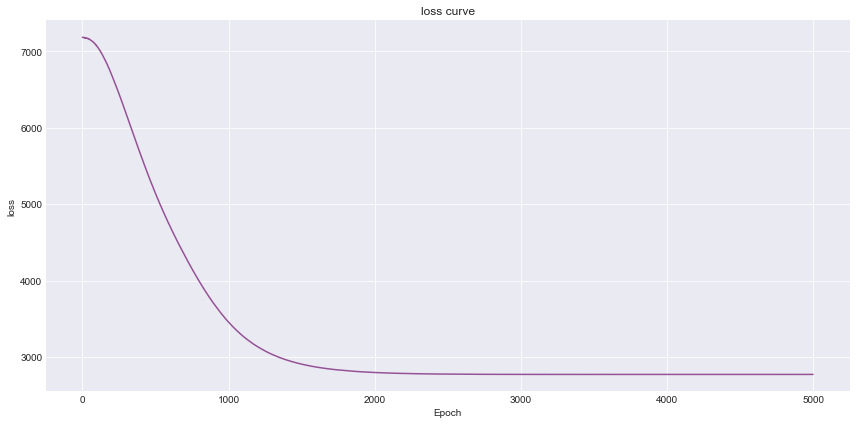

In [10]:
plot_stats(stats)

In [11]:
model.mse(R_true)

tensor(0.0100, grad_fn=<MeanBackward0>)

In [12]:
model.mae(R_true)

tensor(0.0798, grad_fn=<MeanBackward0>)

In [13]:
model.log_prob(R_true)

tensor([-2772.3071, -2771.9683, -2771.4888, -2772.4758, -2771.5032, -2771.0562,
        -2772.9995, -2772.3630, -2772.1201, -2771.7607, -2771.9900, -2772.1057,
        -2771.6870, -2771.5049, -2771.2520, -2771.9756, -2772.2703, -2772.0273,
        -2771.2747, -2771.4990, -2771.7263, -2771.4221, -2772.6531, -2771.4653,
        -2771.9624, -2771.7930, -2771.9768, -2771.6570, -2772.0247, -2772.0234,
        -2771.8743, -2771.8154, -2772.4905, -2772.2510, -2771.6660, -2772.1633,
        -2771.6650, -2772.2900, -2771.2886, -2771.6609, -2771.0034, -2771.0852,
        -2772.0452, -2771.6372, -2772.1228, -2772.0251, -2771.9531, -2771.1594,
        -2771.9375, -2771.7981, -2771.5701, -2771.9443, -2772.0032, -2772.9421,
        -2771.9041, -2771.6228, -2771.7092, -2771.8674, -2772.2539, -2771.1099,
        -2771.1948, -2771.9163, -2771.8655, -2771.4763, -2771.8320, -2771.2102,
        -2771.5923, -2771.6736, -2771.2380, -2770.9836, -2771.1174, -2770.8953,
        -2771.7852, -2771.8591, -2772.55

In [14]:
R_true

tensor([[[-0.4174,  0.1168, -0.0905,  ..., -0.1029,  0.1854, -0.3223],
         [ 2.6166,  0.0333, -2.9407,  ...,  5.3517, -1.1905,  1.7221],
         [-3.4330,  0.7216, -0.9157,  ...,  0.7350,  3.2794, -1.1171],
         ...,
         [ 0.9871, -1.4967,  2.9596,  ..., -2.6095, -1.6240,  1.1600],
         [ 1.0083,  0.6213,  0.1283,  ..., -2.3190, -1.2780, -1.6956],
         [ 0.0565, -0.7797,  1.1822,  ...,  0.4277,  0.0172,  1.2192]],

        [[-0.1916,  0.1799, -0.0876,  ..., -0.1520,  0.2836, -0.4431],
         [ 2.7421,  0.1189, -2.8464,  ...,  5.3587, -1.1849,  1.6212],
         [-3.4172,  0.7537, -1.0429,  ...,  0.5642,  3.1608, -0.8277],
         ...,
         [ 1.1632, -1.4523,  2.8730,  ..., -2.4442, -1.6200,  1.3012],
         [ 0.9074,  0.5302, -0.0337,  ..., -2.3444, -1.2579, -1.5905],
         [-0.1562, -0.7578,  1.0119,  ...,  0.4283, -0.0823,  1.0536]],

        [[-0.3324,  0.1325, -0.1618,  ..., -0.0969,  0.0960, -0.3310],
         [ 2.5777,  0.1426, -2.7058,  ...,  5

In [20]:
model.reconstruct()

tensor([[-0.2898,  0.1578, -0.1094,  ..., -0.1706,  0.2528, -0.2609],
        [ 2.5950,  0.1465, -2.8875,  ...,  5.3892, -1.2971,  1.5609],
        [-3.3686,  0.9001, -0.9781,  ...,  0.5444,  3.2949, -0.9383],
        ...,
        [ 1.0499, -1.4646,  2.9603,  ..., -2.4305, -1.6313,  1.1070],
        [ 0.9538,  0.5664,  0.0114,  ..., -2.3572, -1.2425, -1.5689],
        [-0.0060, -0.9165,  1.1800,  ...,  0.3468, -0.0572,  1.3365]],
       grad_fn=<MmBackward>)

In [23]:
# model.U